In [76]:
from dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2
from collections import Counter
import random
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
def flatInput(train_data,train_labels,test_data,test_labels):
    trainX = train_data
    trainY = train_labels

    tx = test_data
    ty = test_labels

    # Flatten data for test images as a vector and labels as numbers
    flattenDataset = np.nan_to_num(np.array([image.flatten() for image in trainX]))
    flatTest = np.nan_to_num(np.array([image.flatten() for image in tx]))
    fTrainLabels = np.where(trainY == 1)[1]
    fTestLabels = np.where(ty == 1)[1]
    return flattenDataset, flatTest, fTrainLabels, fTestLabels

In [18]:
def pca2Visua(pca,data,labels,nClases):
    # Show a few statistics of the data
    print  "Pca with 2 components explained variance " + str(pca.explained_variance_ratio_)
    print "PCA 2 comp of the data (using train)"

    transformed = pca.transform(data)

    plt.figure()
    allscatter = []
    for c in range(nClases):
        elements = np.where(labels == c)
        temp = plt.scatter(transformed[elements, 0], transformed[elements, 1],
                           facecolors='none', label='Class ' + str(c), c=np.random.rand(3, 1))
        allscatter.append(temp)
    plt.legend(tuple(allscatter),
               tuple(["class " + str(c) for c in range(nClases)]),
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)
    plt.show()

In [77]:
# seed = 100 * random.random()
seed = 100
#Changing the seed will give a new train-val-test split
dataset = Dataset("data/BaselineOuterInner", batch_size=20,seed=seed)
nClases = dataset.getNclasses()

flattenDataset, flatTest, fTrainLabels, fTestLabels = flatInput(dataset.train_data, dataset.train_labels, dataset.test_data, dataset.test_labels)

In [56]:
cn = {0: "Inner fault", 1: "Baseline", 2 : "Outer fault "}

Distribution class for train  Counter({2: 2638, 1: 1658, 0: 1000})
Distribution class for test    Counter({2: 1641, 1: 1033, 0: 569})


Pca with 2 components explained variance [ 0.21964847  0.02036695]
PCA 2 comp of the data (using train)


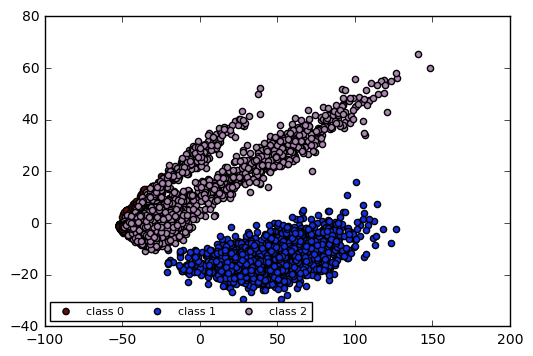

In [19]:
print "Distribution class for train ", Counter(fTrainLabels)
print "Distribution class for test   ",Counter(fTestLabels)
pca = PCA(n_components=2)
pca.fit(flattenDataset)


pca2Visua(pca,flattenDataset,fTrainLabels,nClases)

In [26]:
#Show first 2 images train - test (to show that seed changed)

print dataset.getTrainFilename(0)



plt.figure()
plt.title('test 0 ')
plt.imshow(flatTest[0].reshape((96,96)))
plt.figure()
plt.title('test 1 ')
plt.imshow(flatTest[1].reshape((96,96)))

(5296, 9216)
(9216,)


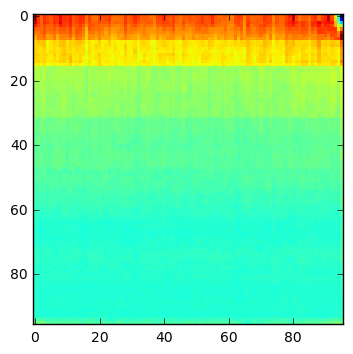

In [54]:
print flattenDataset.shape
print np.mean(flattenDataset,axis=0).shape
a=np.mean(flattenDataset,axis=0)
a.shape
plt.imshow(a.reshape((96,96)),interpolation='none')

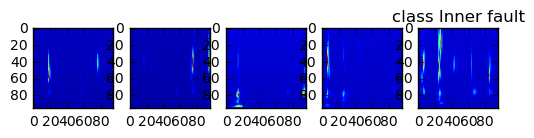

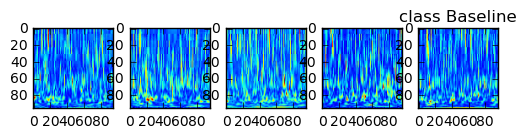

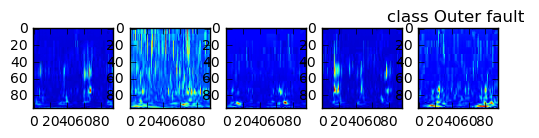

In [74]:
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    
    name = cn[c]
    
    #Show 5 random element of that class
    fig, grid = plt.subplots(1, 5)
    plt.title('class '+str(name))
    
    for j in range(5):
        r=random.randint(0,elements[0].shape[0])
        ind = elements[0][r]
        grid[j].imshow(flattenDataset[ind,:].reshape((96,96)))

(5296, 9216)
(9216,)


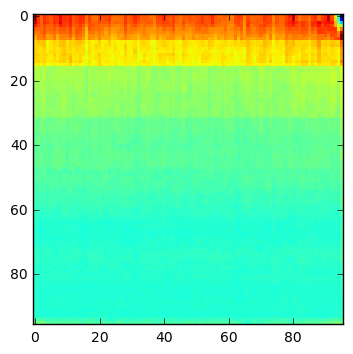

In [54]:
print flattenDataset.shape
print np.mean(flattenDataset,axis=0).shape
a=np.mean(flattenDataset,axis=0)
a.shape
plt.imshow(a.reshape((96,96)),interpolation='none')

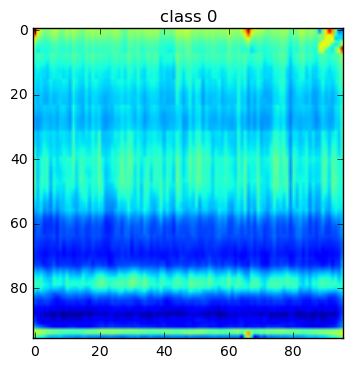

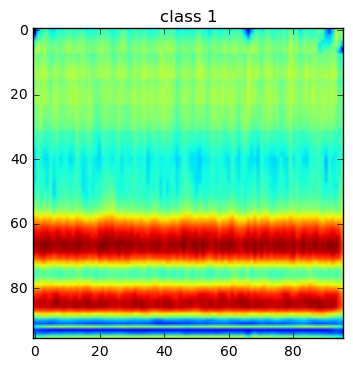

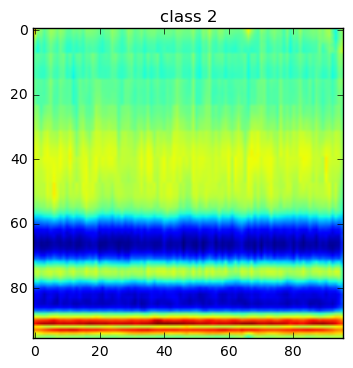

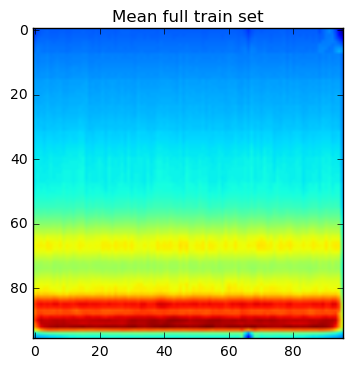

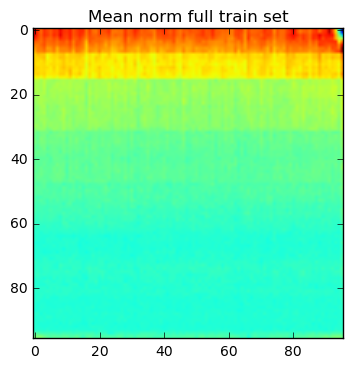

In [55]:
#Show mean image of train per class
#NOTE THIS IMAGE IS NOT THE MEAN IMAGE IN DATASET. This mean image is calculated with normalized images
#THe original mean image was calculated with the original images in train set.
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = np.mean(flattenDataset[elements,:],axis=1).reshape((96,96))
    plt.figure()
    plt.title('class '+str(c))
    plt.imshow(classMean)

normMean = np.mean(flattenDataset,axis=0).reshape((96,96))
plt.figure()
plt.title('Mean full train set')
plt.imshow(dataset.mean)

plt.figure()
plt.title('Mean norm full train set')
plt.imshow(normMean)

In [ ]:
#Choose RAW or PCA30



#Plot mean vector with mean and std


#Show box plots per dim



#Train SVM

#Train MLP


#Train linear model